**Context:** 

Measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available.

This archive contains 2075259 measurements gathered between December 2006 and November 2010 (47 months).

**Notes:**

1. (globalactivepower*1000/60 - submetering1 - submetering2 - submetering3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.

2. The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.

**Attribute Information:**

1. **date :** Date in format dd/mm/yyyy

2. **time :** time in format hh:mm:ss

3. **globalactivepower :** household global minute-averaged active power (in kilowatt)

4. **globalreactivepower :** household global minute-averaged reactive power (in kilowatt)

5. **voltage :** minute-averaged voltage (in volt)

6. **global_intensity :** household global minute-averaged current intensity (in ampere)

7. **submetering1 :** energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).

8. **submetering2 :** energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.

9. **submetering3 :** energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', 100)

In [3]:
na_values = "", "#N/A", "#N/A N/A", "#NA", "-1.#IND", "-1.#QNAN", "-NaN", "-nan", "1.#IND", "1.#QNAN", "<NA>", "N/A", "NA", "NULL", "NaN", "n/a", "nan", "null" , "?"
df = pd.read_csv('../data_projet1/household_power_consumption.txt', delimiter=";", na_values=na_values)

In [4]:
df["DateTime"] = df["Date"] +" "+ df["Time"]

In [5]:
df.Date = pd.to_datetime(df.Date, format="%d/%m/%Y")
df.DateTime = pd.to_datetime(df.DateTime,format="%d/%m/%Y %H:%M:%S")
df.Time = pd.to_datetime(df.Time, format="%H:%M:%S").dt.time

In [6]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 10 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Time                   object        
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
 9   DateTime               datetime64[ns]
dtypes: datetime64[ns](2), float64(7), object(1)
memory usage: 158.3+ MB


In [8]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [9]:
df.duplicated().value_counts()

False    2075259
dtype: int64

In [10]:
df.isna().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
DateTime                     0
dtype: int64

In [11]:
from datetime import date, timedelta

In [12]:
# mes_dates = df.Date.to_period("D")

mes_dates = pd.Series(df.Date.unique()).sort_values()
start_date = mes_dates[0]
end_date = mes_dates[len(mes_dates)-1]
numdays = (end_date - start_date).days

mes_dates = list(mes_dates)

all_dates = []

for x in range (0, (numdays+1)):
    all_dates.append(start_date + timedelta(days = x))

dates_missing = []

for i in range(0, len(all_dates)):
   if (all_dates[i] not in mes_dates):
       dates_missing.append(all_dates[i])
   else:
       pass
    
print(str(start_date)+" à "+str(end_date))
pd.DataFrame(dates_missing)

2006-12-16 00:00:00 à 2010-11-26 00:00:00


""


<AxesSubplot:xlabel='Global_intensity', ylabel='count'>

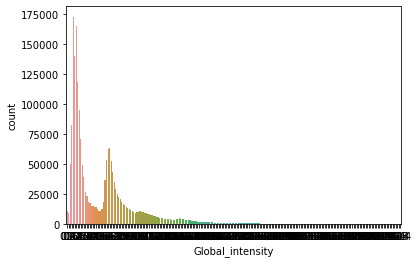

In [13]:
sns.countplot(x=df.Global_intensity, data=df)

In [14]:
# pd.DataFrame(df).plot()

In [15]:
df[df['Date']=="2010-02-09"].nunique()

Date                        1
Time                     1440
Global_active_power       654
Global_reactive_power     149
Voltage                   785
Global_intensity           92
Sub_metering_1             10
Sub_metering_2              3
Sub_metering_3             17
DateTime                 1440
dtype: int64

In [16]:
pd.DataFrame(df[df.Global_intensity.isna()==True]['Date'].value_counts()) 
# 1 jour = 1440 données

,Date
2010-08-20,1440
2010-08-18,1440
2010-08-21,1440
2007-04-29,1440
2010-01-13,1440
2010-08-19,1440
2010-09-26,1440
2010-09-27,1440
2009-06-14,1440
2007-04-28,1419


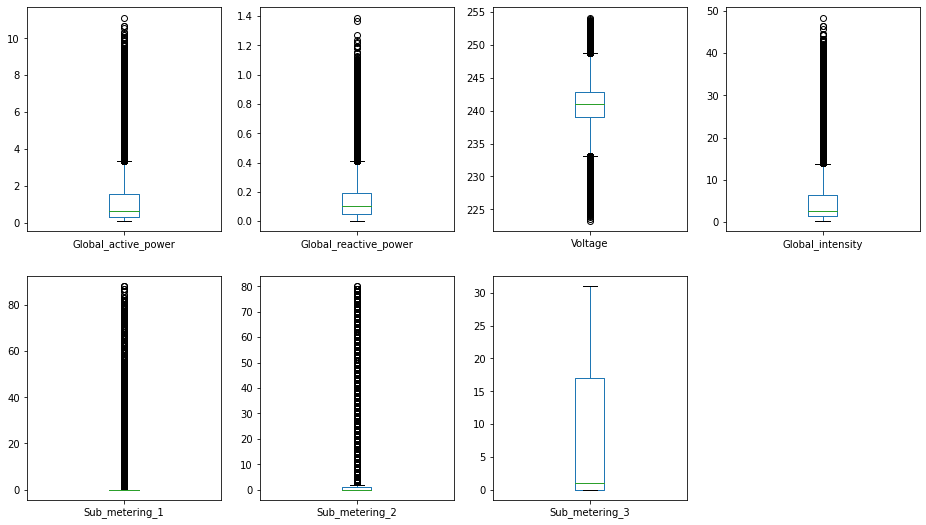

In [17]:
df.plot(kind='box', subplots=True, layout=(3, 4), figsize = (16, 14));

In [18]:
# sns.pairplot(data=df)

In [19]:
# plt.subplots(figsize=(16,5))
# sns.countplot(x=df.Global_intensity, data=df)
# plt.show()

In [20]:
# plt.subplots(figsize=(16,5))
# sns.countplot(x=df.Global_active_power, data=df)
# plt.show()

In [21]:
# plt.subplots(figsize=(16,5))
# sns.countplot(x=df.Global_reactive_power, data=df)
# plt.show()

In [22]:
# plt.subplots(figsize=(16,5))
# sns.countplot(x=df.Voltage, data=df)
# plt.show()

In [23]:
# plt.subplots(figsize=(16,5))
# sns.countplot(x=df.Sub_metering_1, data=df)
# plt.show()

In [24]:
# plt.subplots(figsize=(16,5))
# sns.countplot(x=df.Sub_metering_2, data=df)
# plt.show()

In [25]:
# plt.subplots(figsize=(16,5))
# sns.countplot(x=df.Sub_metering_3, data=df)
# plt.show()

In [26]:
df.corr().style.background_gradient(cmap='coolwarm')

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.247017,-0.399762,0.998889,0.484401,0.434569,0.638555
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120,0.123111,0.139231,0.089617
Voltage,-0.399762,-0.112246,1.000000,-0.411363,-0.195976,-0.167405,-0.268172
Global_intensity,0.998889,0.266120,-0.411363,1.000000,0.489298,0.440347,0.626543
Sub_metering_1,0.484401,0.123111,-0.195976,0.489298,1.000000,0.054721,0.102571
Sub_metering_2,0.434569,0.139231,-0.167405,0.440347,0.054721,1.000000,0.080872
Sub_metering_3,0.638555,0.089617,-0.268172,0.626543,0.102571,0.080872,1.000000


# EDA pour Time Series

<AxesSubplot:xlabel='Time'>

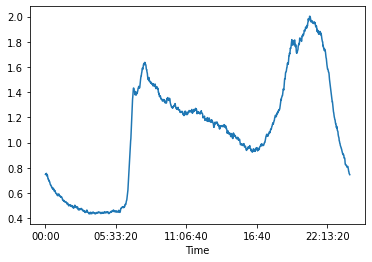

In [27]:
df_day = df.groupby(by=["Time"]).mean()
df_day.Global_active_power.plot()

In [28]:
df_date = df.copy()

In [29]:
df_date = df_date.set_index('DateTime')

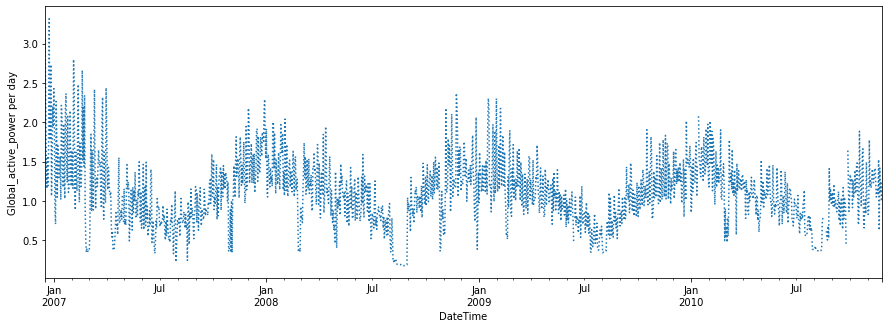

In [30]:
# plot target by day
f, ax1 = plt.subplots(1,1,figsize=(15,5))
dayly = df_date['Global_active_power'].resample('D').mean()
dayly.plot(style=[':', '--', '-'])
plt.ylabel('Global_active_power per day');

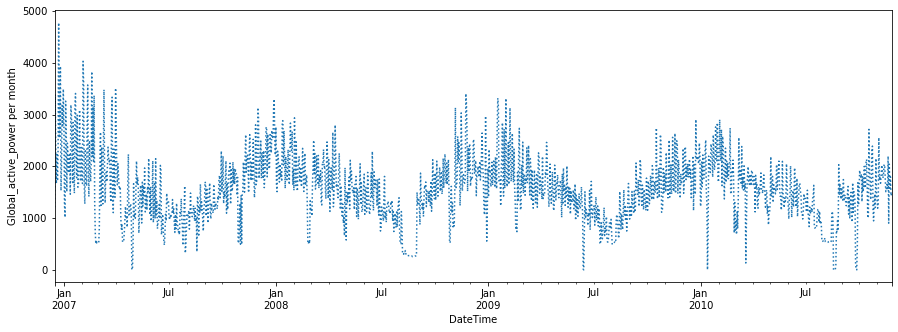

In [31]:
# plot target by month
f, ax1 = plt.subplots(1,1,figsize=(15,5))
monthly = df_date['Global_active_power'].resample('D').sum()
monthly.plot(style=[':', '--', '-'])
plt.ylabel('Global_active_power per month');

In [32]:
df_date['2006-12-16'][::1].sum()

Global_active_power       1209.176
Global_reactive_power       34.922
Voltage                  93552.530
Global_intensity          5180.800
Sub_metering_1               0.000
Sub_metering_2             546.000
Sub_metering_3            4926.000
dtype: float64

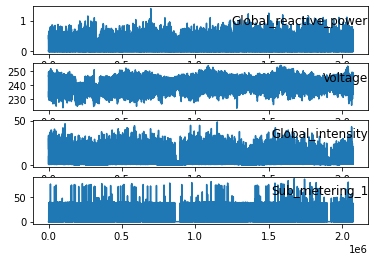

In [33]:
from pandas import read_csv
from matplotlib import pyplot
# load dataset
# dataset = read_csv('pollution.csv', header=0, index_col=0)
values = df_date.values
# specify columns to plot
groups = [3,4,5,6]
i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(df_date.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

In [34]:
raw_df = df_date.resample('H').sum()

In [35]:
raw_df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-16 17:00:00,152.024,8.244,8447.18,651.6,0.0,19.0,607.0
2006-12-16 18:00:00,217.932,4.802,14074.81,936.0,0.0,403.0,1012.0
2006-12-16 19:00:00,204.014,5.114,13993.95,870.2,0.0,86.0,1001.0
2006-12-16 20:00:00,196.114,4.506,14044.29,835.0,0.0,0.0,1007.0
2006-12-16 21:00:00,183.388,4.600,14229.52,782.8,0.0,25.0,1033.0
...,...,...,...,...,...,...,...
2010-11-26 17:00:00,103.554,3.684,14224.18,433.0,0.0,0.0,772.0
2010-11-26 18:00:00,94.408,3.222,14251.91,397.2,0.0,0.0,0.0
2010-11-26 19:00:00,99.560,3.602,14204.46,423.4,0.0,4.0,0.0


# Nous n’ajusterons le modèle que sur la première année de données, puis l’évaluerons sur les 4 années de données restantes.

In [36]:
# prepare data for lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# convert series to supervised learning
def series_to_supervised(data, n_in=7, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# load dataset
dataset = raw_df
values = dataset.values
# integer encode direction
# encoder = LabelEncoder()
# values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict

reframed.drop(reframed.columns[[8,9,10,11,12,13]], axis=1, inplace=True)
print(reframed)

       var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1       0.386208   0.177443   0.558893   0.382619        0.0   0.006820   
2       0.553644   0.103358   0.931236   0.549618        0.0   0.144652   
3       0.518286   0.110073   0.925886   0.510981        0.0   0.030869   
4       0.498217   0.096987   0.929217   0.490311        0.0   0.000000   
5       0.465887   0.099010   0.941472   0.459659        0.0   0.008973   
...          ...        ...        ...        ...        ...        ...   
34584   0.162781   0.278476   0.954569   0.162419        0.0   0.020459   
34585   0.263073   0.079294   0.941119   0.254257        0.0   0.000000   
34586   0.239838   0.069350   0.942953   0.233235        0.0   0.000000   
34587   0.252927   0.077529   0.939814   0.248620        0.0   0.001436   
34588   0.177379   0.078993   0.950354   0.173106        0.0   0.022972   

       var7(t-1)   var1(t)  
1       0.469451  0.553644  
2       0.782676  0.518286  
3       0.77

In [37]:
dataset

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-16 17:00:00,152.024,8.244,8447.18,651.6,0.0,19.0,607.0
2006-12-16 18:00:00,217.932,4.802,14074.81,936.0,0.0,403.0,1012.0
2006-12-16 19:00:00,204.014,5.114,13993.95,870.2,0.0,86.0,1001.0
2006-12-16 20:00:00,196.114,4.506,14044.29,835.0,0.0,0.0,1007.0
2006-12-16 21:00:00,183.388,4.600,14229.52,782.8,0.0,25.0,1033.0
...,...,...,...,...,...,...,...
2010-11-26 17:00:00,103.554,3.684,14224.18,433.0,0.0,0.0,772.0
2010-11-26 18:00:00,94.408,3.222,14251.91,397.2,0.0,0.0,0.0
2010-11-26 19:00:00,99.560,3.602,14204.46,423.4,0.0,4.0,0.0


L’exemple ci-dessous divise le jeu de données en trains et ensembles de tests, puis divise le train et les ensembles de tests en variables d’entrée et de sortie. Enfin, les entrées (X) sont remodelées au format 3D attendu par les LSTM, à savoir [samples, timesteps, features].  
Nous n’ajustons le modèle pour que sur la première année de données, puis l’évaluerons sur les 4 années de données restantes.

In [38]:
...
# split into train and test sets
values = reframed.values
n_train_hours = 365 * 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(8760, 1, 7) (8760,) (25828, 1, 7) (25828,)


L’exécution de cet exemple imprime la forme du train et teste les jeux d’entrée et de sortie avec environ 9 000 heures de données pour l’entraînement et environ 35 000 heures pour les tests.

In [39]:
test.shape

(25828, 8)

Epoch 1/50
274/274 - 6s - loss: 0.0865 - val_loss: 0.0659 - 6s/epoch - 22ms/step
Epoch 2/50
274/274 - 2s - loss: 0.0707 - val_loss: 0.0618 - 2s/epoch - 8ms/step
Epoch 3/50
274/274 - 2s - loss: 0.0670 - val_loss: 0.0605 - 2s/epoch - 8ms/step
Epoch 4/50
274/274 - 2s - loss: 0.0658 - val_loss: 0.0599 - 2s/epoch - 8ms/step
Epoch 5/50
274/274 - 2s - loss: 0.0656 - val_loss: 0.0597 - 2s/epoch - 7ms/step
Epoch 6/50
274/274 - 2s - loss: 0.0655 - val_loss: 0.0596 - 2s/epoch - 7ms/step
Epoch 7/50
274/274 - 2s - loss: 0.0654 - val_loss: 0.0595 - 2s/epoch - 8ms/step
Epoch 8/50
274/274 - 2s - loss: 0.0654 - val_loss: 0.0596 - 2s/epoch - 7ms/step
Epoch 9/50
274/274 - 2s - loss: 0.0654 - val_loss: 0.0596 - 2s/epoch - 7ms/step
Epoch 10/50
274/274 - 2s - loss: 0.0653 - val_loss: 0.0595 - 2s/epoch - 7ms/step
Epoch 11/50
274/274 - 2s - loss: 0.0652 - val_loss: 0.0595 - 2s/epoch - 7ms/step
Epoch 12/50
274/274 - 2s - loss: 0.0651 - val_loss: 0.0594 - 2s/epoch - 8ms/step
Epoch 13/50
274/274 - 3s - loss: 0.0

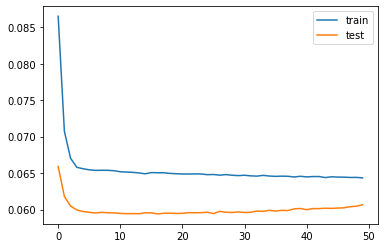

In [40]:
from tensorflow import keras

# design network
model = keras.Sequential()
model.add(keras.layers.LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(keras.layers.Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=32, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [41]:
test_X

array([[[0.37725085, 0.08458889, 0.9460147 , ..., 0.        ,
         0.00897344, 0.80897135]],

       [[0.40036893, 0.05484288, 0.94340587, ..., 0.        ,
         0.        , 0.804331  ]],

       [[0.43200758, 0.27804562, 0.945312  , ..., 0.        ,
         0.0086145 , 0.80742455]],

       ...,

       [[0.23983823, 0.06934997, 0.94295335, ..., 0.        ,
         0.        , 0.        ]],

       [[0.2529266 , 0.07752906, 0.93981385, ..., 0.        ,
         0.00143575, 0.        ]],

       [[0.17737888, 0.07899268, 0.9503537 , ..., 0.        ,
         0.022972  , 0.        ]]], dtype=float32)

In [42]:
from numpy import concatenate
from math import sqrt
from sklearn.metrics import mean_squared_error

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))


In [43]:
yhat.shape

(25828, 1)

In [44]:
test_X[:, 1:].shape

(25828, 6)

In [45]:
# invert scaling for forecast
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
r2 = sqrt(r2_score(inv_y, inv_yhat))
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
explained_variance_score = sqrt(explained_variance_score(inv_y, inv_yhat))
print('Test MSE: %.3f' % rmse)
print('Test R2: %.3f' % r2)
print('Test explained_variance_score: %.3f' % explained_variance_score)

Test MSE: 36.638
Test R2: 0.705
Test explained_variance_score: 0.716


In [46]:
yhat

array([[0.34355557],
       [0.3573491 ],
       [0.41521218],
       ...,
       [0.26421103],
       [0.27845103],
       [0.19852142]], dtype=float32)

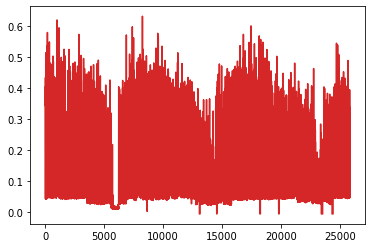

In [47]:
# ax = plot(alpha=0.5, title="Average Sales")
plt.plot(yhat,label="Forecast", color='C3')
# ax.legend();

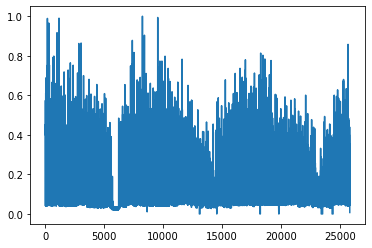

In [48]:
plt.plot(test_y,label="test", color='C0')

Nous n’ajustons le modèle pour que sur les deuw premières années de données, puis l’évaluerons sur les 2 années de données restantes.

In [74]:
# prepare data for lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# convert series to supervised learning
def series_to_supervised(data, n_in=7, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# load dataset
dataset2 = raw_df
values2 = dataset2.values
# integer encode direction
# encoder = LabelEncoder()
# values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values2 = values2.astype('float32')
# normalize features
scaler2 = MinMaxScaler(feature_range=(0, 1))
scaled = scaler2.fit_transform(values2)
# frame as supervised learning
reframed2 = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict

reframed2.drop(reframed2.columns[[8,9,10,11,12,13]], axis=1, inplace=True)
print(reframed2.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.386208   0.177443   0.558893   0.382619        0.0   0.006820   
2   0.553644   0.103358   0.931236   0.549618        0.0   0.144652   
3   0.518286   0.110073   0.925886   0.510981        0.0   0.030869   
4   0.498217   0.096987   0.929217   0.490311        0.0   0.000000   
5   0.465887   0.099010   0.941472   0.459659        0.0   0.008973   

   var7(t-1)   var1(t)  
1   0.469451  0.553644  
2   0.782676  0.518286  
3   0.774169  0.498217  
4   0.778809  0.465887  
5   0.798917  0.335359  


In [90]:
...
# split into train2 and test2 sets
values2 = reframed2.values
n_train2_hours = 1440 * 24
train2 = values2[:n_train2_hours, :]
test2 = values2[n_train2_hours:, :]
# split into input and outputs
train2_X, train2_y = train2[:, :-1], train2[:, -1]
test2_X, test2_y = test2[:, :-1], test2[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train2_X = train2_X.reshape((train2_X.shape[0], 1, train2_X.shape[1]))
test2_X = test2_X.reshape((test2_X.shape[0], 1, test2_X.shape[1]))
print(train2_X.shape, train2_y.shape, test2_X.shape, test2_y.shape)

(34560, 1, 7) (34560,) (28, 1, 7) (28,)


In [91]:
test2.shape

(28, 8)

In [92]:
train2_X

array([[[0.38620847, 0.17744297, 0.55889326, ..., 0.        ,
         0.00681981, 0.46945086]],

       [[0.55364406, 0.10335772, 0.9312358 , ..., 0.        ,
         0.14465183, 0.7826759 ]],

       [[0.51828617, 0.11007318, 0.92588586, ..., 0.        ,
         0.03086863, 0.77416855]],

       ...,

       [[0.04582961, 0.07219113, 0.9722504 , ..., 0.        ,
         0.        , 0.        ]],

       [[0.05075807, 0.1417133 , 0.9762182 , ..., 0.        ,
         0.01687006, 0.        ]],

       [[0.08258475, 0.11683168, 0.96448153, ..., 0.        ,
         0.01076813, 0.        ]]], dtype=float32)

In [94]:
from tensorflow import keras

# design network
model2 = keras.Sequential()
model2.add(keras.layers.LSTM(50, input_shape=(train2_X.shape[1], train2_X.shape[2])))
model2.add(keras.layers.Dense(1))
model2.compile(loss='mae', optimizer='adam')
# fit network
history2 = model2.fit(train2_X, train2_y, epochs=50, batch_size=32, validation_data=(test2_X, test2_y), verbose=2, shuffle=False)
# plot history


Epoch 1/50
1080/1080 - 5s - loss: 0.0673 - val_loss: 0.0556 - 5s/epoch - 5ms/step
Epoch 2/50
1080/1080 - 2s - loss: 0.0611 - val_loss: 0.0561 - 2s/epoch - 2ms/step
Epoch 3/50
1080/1080 - 2s - loss: 0.0608 - val_loss: 0.0550 - 2s/epoch - 2ms/step
Epoch 4/50
1080/1080 - 3s - loss: 0.0607 - val_loss: 0.0552 - 3s/epoch - 2ms/step
Epoch 5/50
1080/1080 - 3s - loss: 0.0606 - val_loss: 0.0555 - 3s/epoch - 2ms/step
Epoch 6/50
1080/1080 - 2s - loss: 0.0605 - val_loss: 0.0559 - 2s/epoch - 2ms/step
Epoch 7/50
1080/1080 - 3s - loss: 0.0604 - val_loss: 0.0563 - 3s/epoch - 2ms/step
Epoch 8/50
1080/1080 - 2s - loss: 0.0603 - val_loss: 0.0563 - 2s/epoch - 2ms/step
Epoch 9/50
1080/1080 - 2s - loss: 0.0603 - val_loss: 0.0569 - 2s/epoch - 2ms/step
Epoch 10/50
1080/1080 - 2s - loss: 0.0603 - val_loss: 0.0568 - 2s/epoch - 2ms/step
Epoch 11/50
1080/1080 - 2s - loss: 0.0602 - val_loss: 0.0569 - 2s/epoch - 2ms/step
Epoch 12/50
1080/1080 - 2s - loss: 0.0602 - val_loss: 0.0569 - 2s/epoch - 2ms/step
Epoch 13/50
1

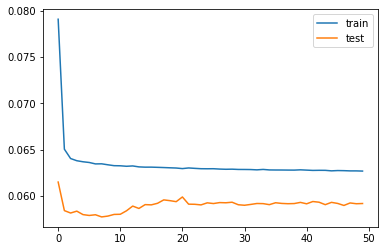

In [ ]:
pyplot.plot(history2.history['loss'], label='train')
pyplot.plot(history2.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

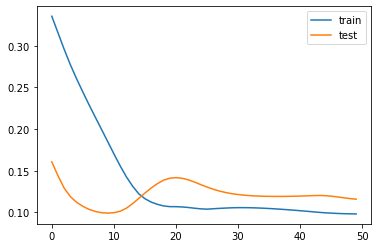

In [ ]:
pyplot.plot(history2.history['loss'], label='train')
pyplot.plot(history2.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

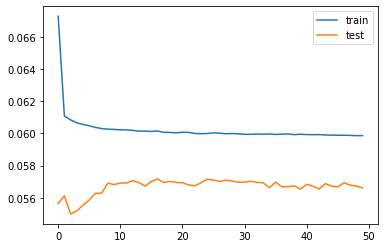

In [95]:
pyplot.plot(history2.history['loss'], label='train')
pyplot.plot(history2.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [96]:
test2_X

array([[[0.22560667, 0.06758502, 0.94585985, 0.21702878, 0.        ,
         0.        , 0.        ]],

       [[0.33710676, 0.10826518, 0.9371204 , 0.3291838 , 0.        ,
         0.        , 0.26836812]],

       [[0.3552252 , 0.19573826, 0.9437387 , 0.34527305, 0.        ,
         0.0143575 , 0.3882444 ]],

       [[0.2511737 , 0.12660353, 0.95933735, 0.24051674, 0.        ,
         0.01184494, 0.        ]],

       [[0.20469882, 0.06383986, 0.95552564, 0.19518496, 0.        ,
         0.        , 0.        ]],

       [[0.19016239, 0.10193715, 0.9606096 , 0.18179683, 0.        ,
         0.        , 0.24593967]],

       [[0.1458723 , 0.10314249, 0.9728492 , 0.1395185 , 0.        ,
         0.01292175, 0.36117554]],

       [[0.04485916, 0.11523891, 0.95891523, 0.04533176, 0.        ,
         0.01256281, 0.        ]],

       [[0.04283189, 0.11218252, 0.9570786 , 0.04474457, 0.        ,
         0.        , 0.        ]],

       [[0.04167853, 0.10124838, 0.9628652 , 0.04321785

In [97]:
from numpy import concatenate
from math import sqrt
from sklearn.metrics import mean_squared_error

# make a prediction
yhat2 = model2.predict(test2_X)
test2_X = test2_X.reshape((test2_X.shape[0], test2_X.shape[2]))


In [98]:
yhat2.shape

(28, 1)

In [99]:
test2_X[:, 1:].shape

(28, 6)

In [100]:
# invert scaling for forecast
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
inv_yhat2 = concatenate((yhat2, test2_X[:, 1:]), axis=1)
inv_yhat2 = scaler.inverse_transform(inv_yhat2)
inv_yhat2 = inv_yhat2[:,0]
# invert scaling for actual
test2_y = test2_y.reshape((len(test2_y), 1))
inv_y2 = concatenate((test2_y, test2_X[:, 1:]), axis=1)
inv_y2 = scaler.inverse_transform(inv_y2)
inv_y2 = inv_y2[:,0]
# calculate RMSE
r2 = sqrt(r2_score(inv_y2, inv_yhat2))
rmse = sqrt(mean_squared_error(inv_y2, inv_yhat2))
explained_variance_score = sqrt(explained_variance_score(inv_y2, inv_yhat2))
print('Test MSE: %.3f' % rmse)
print('Test R2: %.3f' % r2)
print('Test explained_variance_score: %.3f' % explained_variance_score)

Test MSE: 32.258
Test R2: 0.645
Test explained_variance_score: 0.645


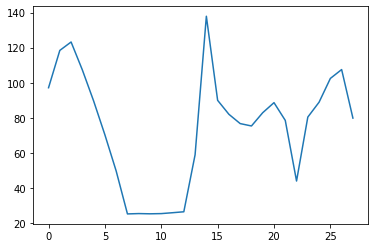

In [101]:
plt.plot(inv_yhat2)

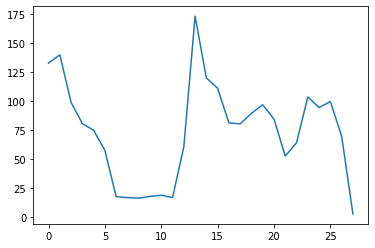

In [102]:
plt.plot(inv_y2)

In [103]:
yhat

array([[0.34355557],
       [0.3573491 ],
       [0.41521218],
       ...,
       [0.26421103],
       [0.27845103],
       [0.19852142]], dtype=float32)

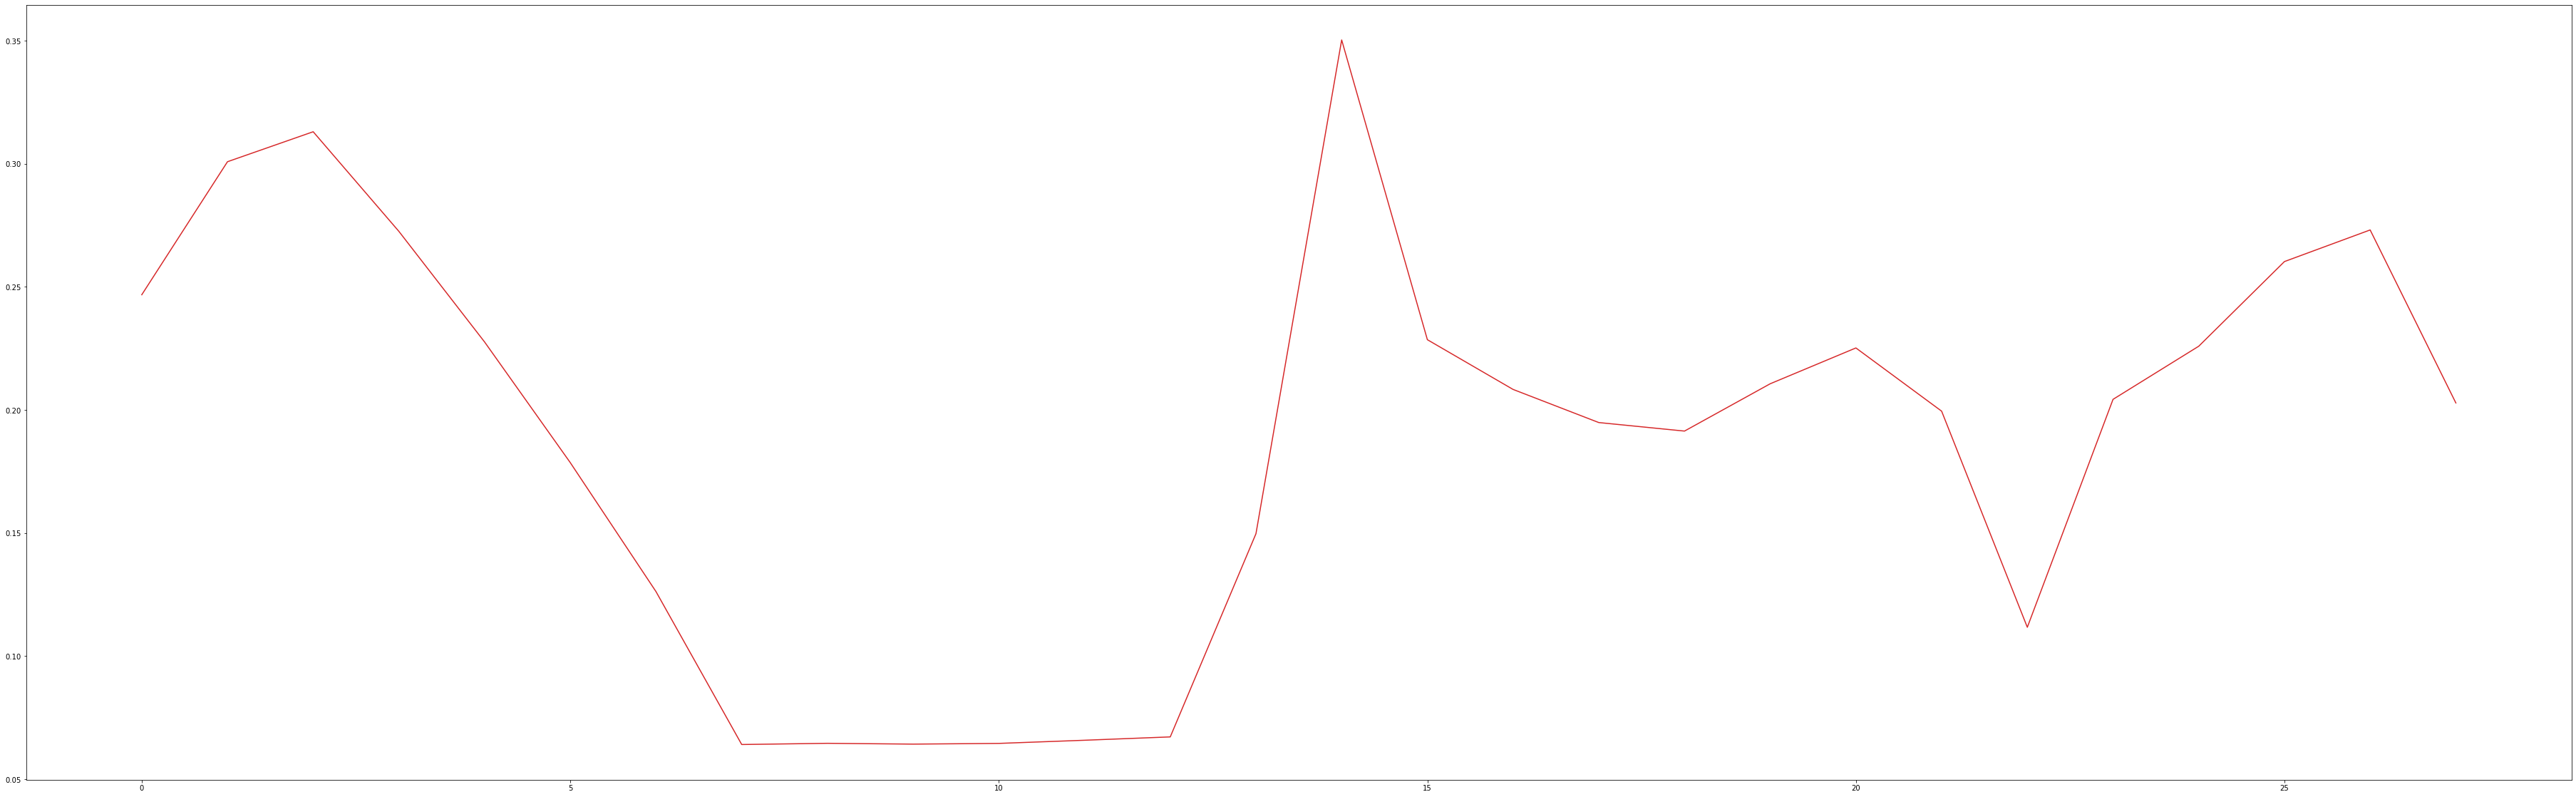

In [104]:
# ax = plot(alpha=0.5, title="Average Sales")
plt.figure(figsize=(64, 20))


plt.plot(yhat2,label="Forecast", color='C3')
plt.show()
# ax.legend();

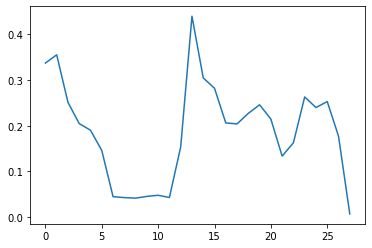

In [105]:
plt.plot(test2_y,label="test", color='C0')